In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA SETS/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
new_column_names = {
     'cp': 'chest_pain_type',
     'chol': 'serum_cholesterol',
     'thalach': 'maximum_heart_rate_achieved',
     'caa': 'number_of_major_vessels_colored_by_fluoroscopy',
     'thall': 'thalassemia_types',
     'oldpeak': 'exercise_induced_angina',
     'trtbps': 'resting_blood_pressure'
 }
data = data.rename(columns=new_column_names)
data

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fbs,restecg,thalachh,exng,exercise_induced_angina,slp,number_of_major_vessels_colored_by_fluoroscopy,thalassemia_types,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


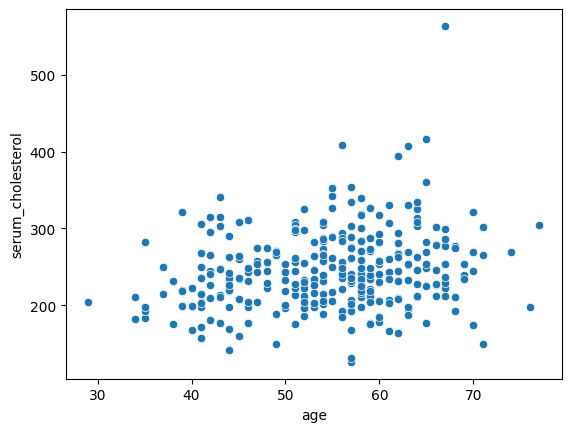

In [ ]:
sns.scatterplot(data=data, x='age', y='serum_cholesterol')
plt.show()

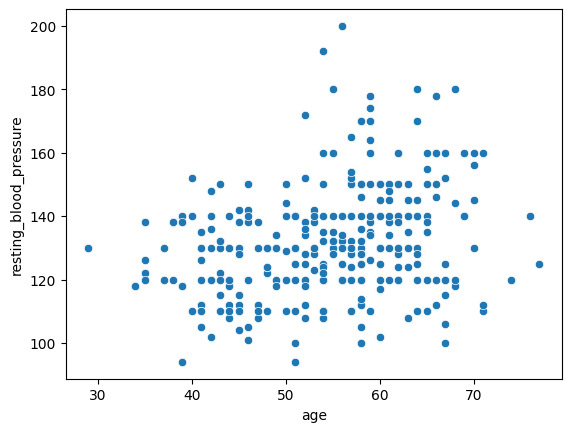

In [ ]:
sns.scatterplot(data=data, x='age', y='resting_blood_pressure')
plt.show()

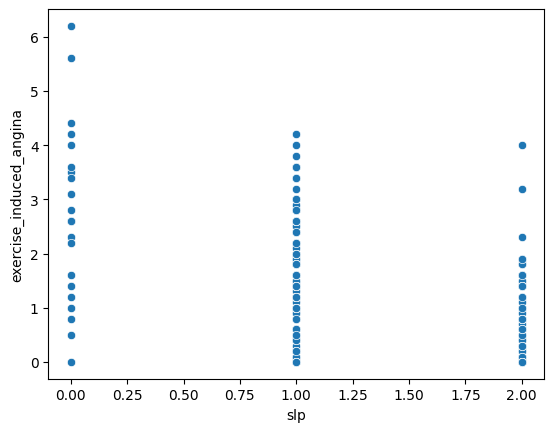

In [ ]:
sns.scatterplot(data=data, x='slp', y='exercise_induced_angina')
plt.show()

<Axes: >

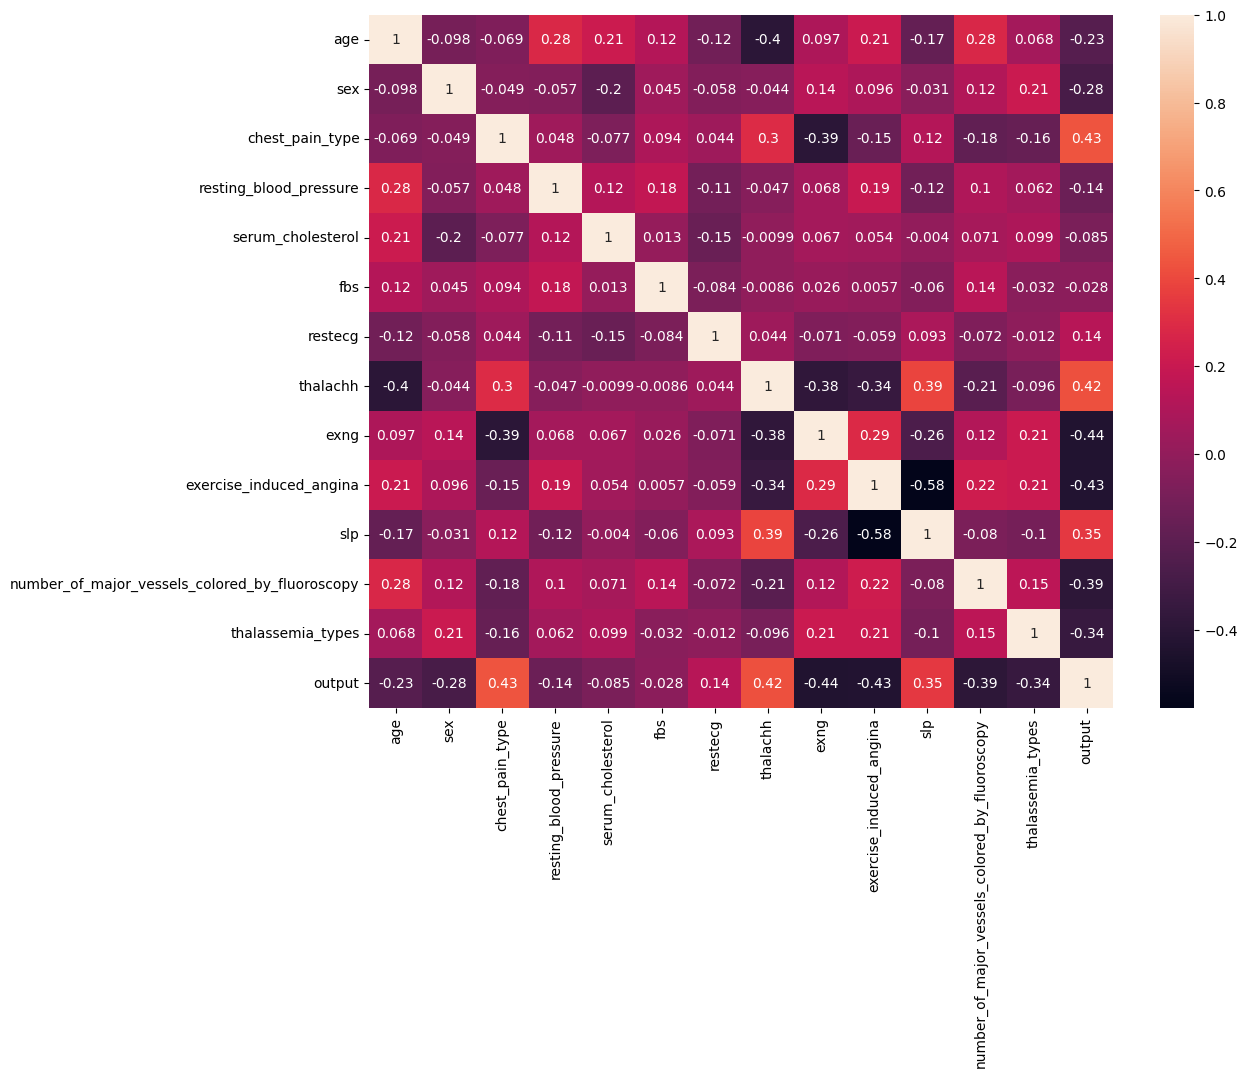

In [ ]:
Correlation_Matrix=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(Correlation_Matrix,annot=True,cmap='rocket')

In [ ]:
X=data.drop(['resting_blood_pressure','serum_cholesterol','fbs','restecg','age','sex','output'],axis=1)
y=data['output']
data

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fbs,restecg,thalachh,exng,exercise_induced_angina,slp,number_of_major_vessels_colored_by_fluoroscopy,thalassemia_types,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,chest_pain_type,thalachh,exng,exercise_induced_angina,slp,number_of_major_vessels_colored_by_fluoroscopy,thalassemia_types
124,2,179,0,0.0,2,0,2
72,1,202,0,0.0,2,0,2
15,2,158,0,1.6,1,0,2
10,0,160,0,1.2,2,0,2
163,2,173,0,0.0,2,4,2


In [ ]:
y_train.head()

,output
124,1
72,1
15,1
10,1
163,1


In [ ]:
# Identify categorical columns in the features set
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Encode categorical features using OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = enc.fit_transform(X_train[categorical_cols]).toarray()  # Fit and transform on training data
X_test_encoded = enc.transform(X_test[categorical_cols]).toarray()        # Transform on testing data


In [ ]:
# Separate numerical features for training and testing data
X_train_numerical = X_train.select_dtypes(include=['number']).values
X_test_numerical = X_test.select_dtypes(include=['number']).values


In [ ]:
# Combine encoded categorical features with numerical features for both training and testing sets
X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)

In [ ]:
# Encode the target variable (y) into numeric format using LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Fit and transform on training labels
y_test = le.transform(y_test)        # Transform on testing labels

In [ ]:
# Function to calculate class weights to handle imbalanced classes
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {class_label: total_samples / (2.0 * class_count) for class_label, class_count in zip(unique_classes, class_counts)}
    return class_weights
# Calculate class weights for Logistic Regression model
class_weights = calculate_class_weights(y_train)
# Train the Logistic Regression model with calculated class weights
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)


LogisticRegression(class_weight={0: 1.092783505154639, 1: 0.9217391304347826})

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display detailed classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8131868131868132
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Confusion Matrix:
 [[33  8]
 [ 9 41]]


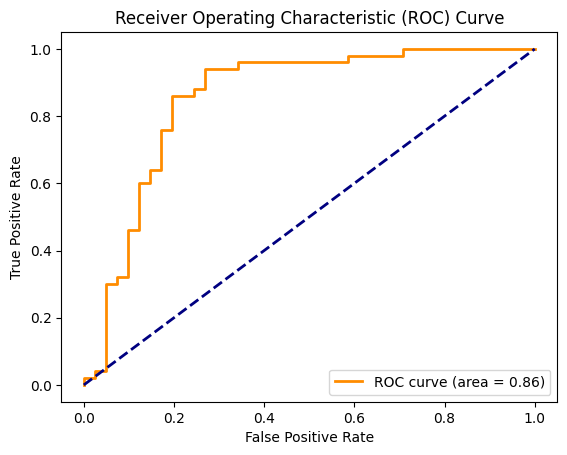

In [ ]:
# Calculate the ROC curve and AUC for the model's performance
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Calculate FPR and TPR for different thresholds
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# KNN CLASSIFICATION

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
# Encode the target variable y for KNN model compatibility
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Encode training labels
y_test = le.transform(y_test)        # Encode testing labels
print("Encoded target variable y_train:\n", y_train[:10])
print("Encoded target variable y_test:\n", y_test[:10])

Encoded target variable y_train:
 [1 1 1 1 1 1 1 1 0 1]
Encoded target variable y_test:
 [0 0 1 0 1 1 1 0 0 1]


In [ ]:
# Identify and encode categorical features in X_train and X_test using OneHotEncoder
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Now you can identify and encode categorical features
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns to encode:\n", categorical_cols)

Categorical columns to encode:
 RangeIndex(start=0, stop=0, step=1)


In [ ]:
# Identify and encode categorical features in X_train and X_test using OneHotEncoder
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Replace with your actual categorical column names:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # Get categorical column names dynamically
#categorical_cols = ['thal', 'cp', 'slope', 'restecg', 'ca', 'exang'] # Example replacement with real column names - adjust to your data
print("Categorical columns to encode:\n", categorical_cols)

# Now proceed with OneHotEncoding as before
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for toarray() compatibility
X_train_encoded = enc.fit_transform(X_train[categorical_cols])  # Fit and transform on training data
X_test_encoded = enc.transform(X_test[categorical_cols])       # Transform on testing data
print("Encoded categorical features (first 2 rows of X_train):\n", X_train_encoded[:2])
print("Encoded categorical features (first 2 rows of X_test):\n", X_test_encoded[:2])

Categorical columns to encode:
 []
Encoded categorical features (first 2 rows of X_train):
 []
Encoded categorical features (first 2 rows of X_test):
 []


In [ ]:
 #Combine the encoded categorical features with numerical features
X_train_numerical = X_train.select_dtypes(include=['number']).values
X_test_numerical = X_test.select_dtypes(include=['number']).values
X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)
print("Combined feature set for X_train (first 2 rows):\n", X_train[:2])
print("Combined feature set for X_test (first 2 rows):\n", X_test[:2])

Combined feature set for X_train (first 2 rows):
 [[  2. 179.   0.   0.   2.   0.   2.]
 [  1. 202.   0.   0.   2.   0.   2.]]
Combined feature set for X_test (first 2 rows):
 [[  0.  112.    1.    0.6   1.    1.    1. ]
 [  3.  159.    0.    0.2   1.    0.    3. ]]


In [ ]:
# Initialize and train the KNN classifier with k=3 (you can change this value)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN model trained with k=3")

KNN model trained with k=3


In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
print("Predictions on test set (first 10):\n", y_pred[:10])

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display detailed classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions on test set (first 10):
 [0 1 1 0 1 1 1 0 0 1]
Accuracy: 0.7582417582417582
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.75      0.84      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91

Confusion Matrix:
 [[27 14]
 [ 8 42]]


In [ ]:
# Plot the ROC Curve
# Binarize the output for ROC AUC score calculation
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Assuming binary classes 0 and 1
y_pred_proba = knn.predict_proba(X_test)  # Get predicted probabilities for each class
print("Predicted probabilities for each class (first 2 rows):\n", y_pred_proba[:2])

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} - AUC: {roc_auc[i]}")


Predicted probabilities for each class (first 2 rows):
 [[0.66666667 0.33333333]
 [0.         1.        ]]
Class 0 - AUC: 0.20829268292682926


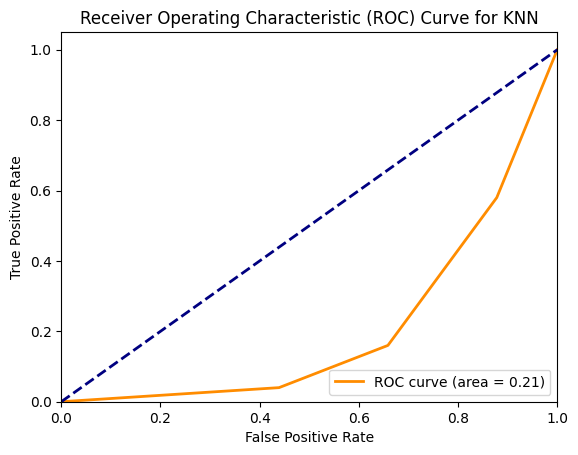

In [ ]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

# DECISION TREE

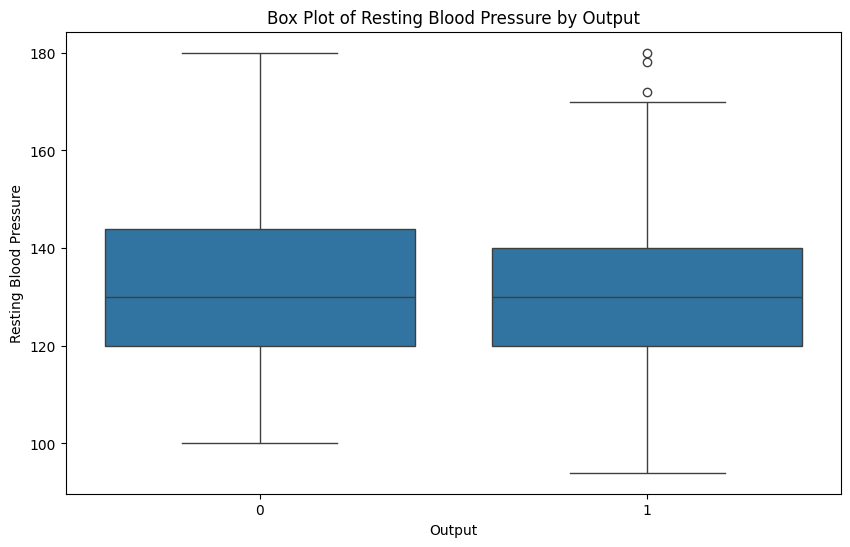

In [ ]:
df = data.copy()

# Remove outliers in relevant columns
# For `resting_blood_pressure` (assuming `output` == 0 needs outlier removal)

# Calculate IQR for `resting_blood_pressure` in `output` == 0
output_0_df = df[df['output'] == 0]
Q1 = output_0_df['resting_blood_pressure'].quantile(0.25)
Q3 = output_0_df['resting_blood_pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in resting_blood_pressure where output is 0
df = df[~((df['output'] == 0) & ((df['resting_blood_pressure'] < lower_bound) |
                                  (df['resting_blood_pressure'] > upper_bound)))]

# Box plot to visualize data distribution
plt.figure(figsize=(10, 6))

# Create a box plot to visualize outliers in `resting_blood_pressure` based on `output`
sns.boxplot(x='output', y='resting_blood_pressure', data=df)
plt.title('Box Plot of Resting Blood Pressure by Output')
plt.xlabel('Output')
plt.ylabel('Resting Blood Pressure')

# Display the plot
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [ ]:
# Split the data
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training features sample:\n", X_train.head())
print("Training target sample:\n", y_train.head())


Training features sample:
      age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
185   44    1                0                     112                290   
72    29    1                1                     130                204   
15    50    0                2                     120                219   
10    54    1                0                     140                239   
196   46    1                2                     150                231   

     fbs  restecg  thalachh  exng  exercise_induced_angina  slp  \
185    0        0       153     0                      0.0    2   
72     0        0       202     0                      0.0    2   
15     0        1       158     0                      1.6    1   
10     0        1       160     0                      1.2    2   
196    0        1       147     0                      3.6    1   

     number_of_major_vessels_colored_by_fluoroscopy  thalassemia_types  
185                               

In [ ]:
# Preprocess data with ColumnTransformer
categorical_cols = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols.tolist()),
    ])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print("Preprocessed X_train (first 2 rows):\n", X_train[:2])

Preprocessed X_train (first 2 rows):
 [[ 44.   1.   0. 112. 290.   0.   0. 153.   0.   0.   2.   1.   2.]
 [ 29.   1.   1. 130. 204.   0.   0. 202.   0.   0.   2.   0.   2.]]


In [ ]:
# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)
print("Decision Tree Model Trained.")


Decision Tree Model Trained.


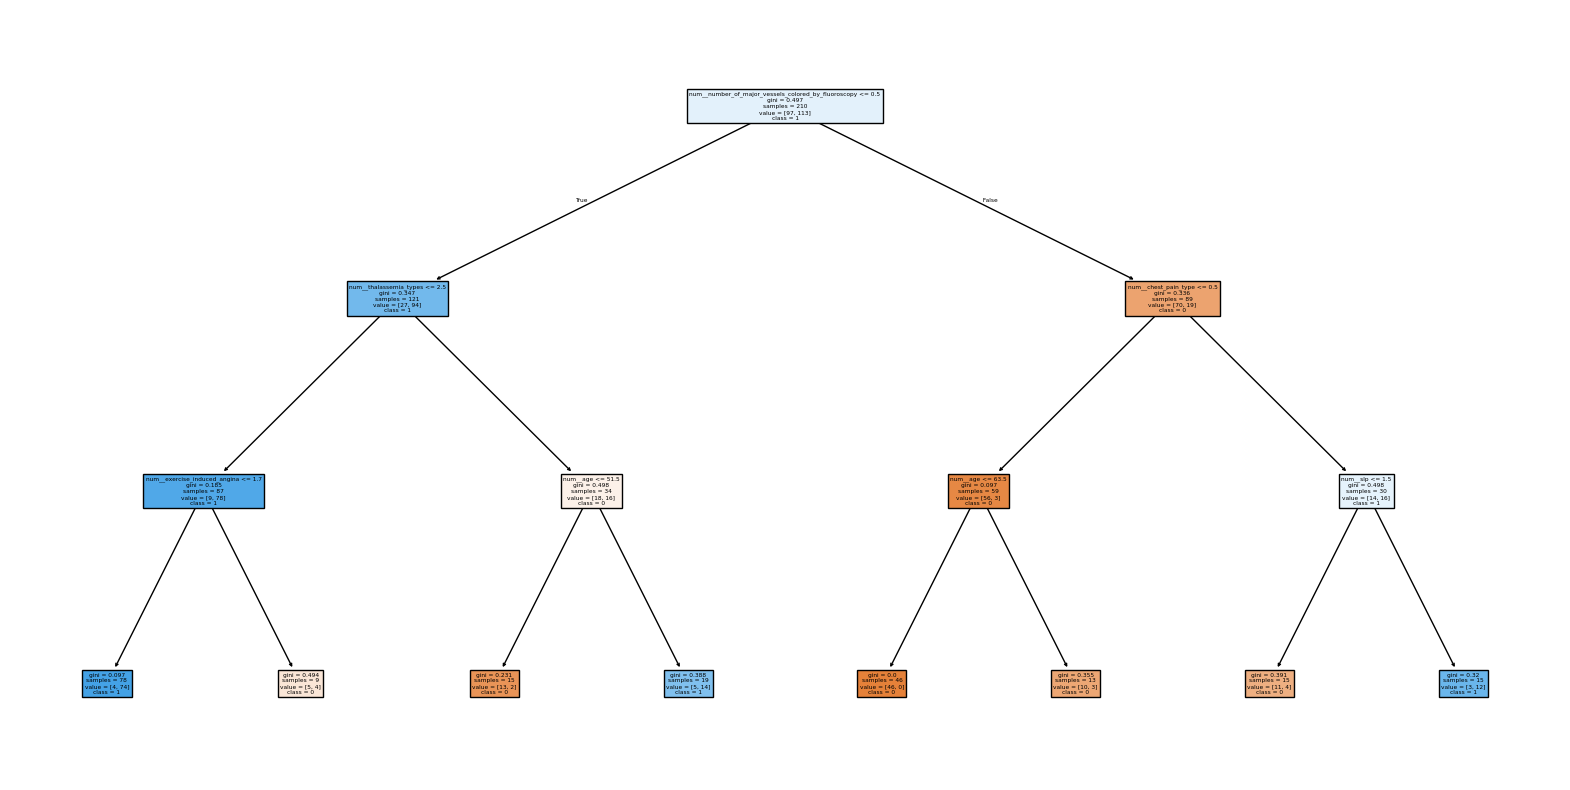

Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.73      0.79      0.76        52

    accuracy                           0.71        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.71      0.71      0.71        91

Confusion Matrix:
 [[24 15]
 [11 41]]


In [ ]:
feature_names = preprocessor.get_feature_names_out()
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

AUC: 0.8030078895463512


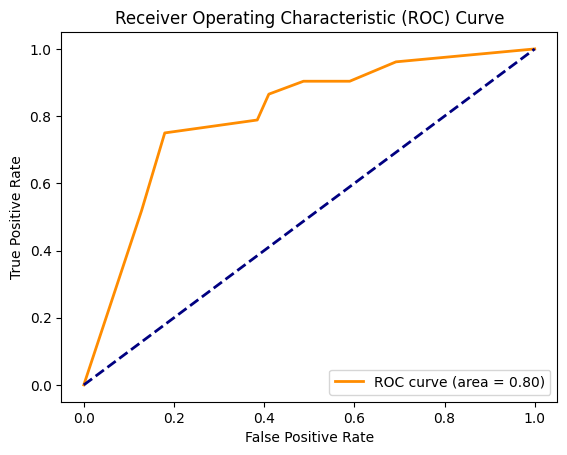

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

so after the whole analysis i can conclude that the best machine learning model for this dataset is "Logistic Regression" beacause it gives best roc curve curve among the three.